In [1]:
#item based/content based filtering in movie recommendation system
#dataset used: movie lens 100k 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
#Generating Dataset

In [5]:
#itemId is movie id
columnNames = ["userId", "itemId", "rating", "timestamp"]
df = pd.read_csv("ml-100k/u.data", sep='\t', names=columnNames)

In [6]:
df.head()

,userId,itemId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [7]:
df.shape

(100000, 4)

In [8]:
 df['userId'].nunique()

943

In [9]:
df['itemId'].nunique()

1682

In [10]:
moviesTitle = pd.read_csv("ml-100k/u.item", sep="\|", encoding="ISO-8859-1", header=None)

In [11]:
moviesTitle.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
moviesTitle.shape

(1682, 24)

In [13]:
moviesTitle = moviesTitle[[0,1]]
moviesTitle.columns = ['itemId', 'movieName']

In [14]:
moviesTitle.head()

,itemId,movieName
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [15]:
df = pd.merge(df, moviesTitle, on='itemId')

In [16]:
df

,userId,itemId,rating,timestamp,movieName
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [17]:
 #Exploratory Data Analysis

In [18]:
df.groupby('movieName').mean()['rating'].sort_values(ascending=False).head()

movieName
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [19]:
df.groupby('movieName').count()['rating'].sort_values(ascending=False)

movieName
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [20]:
ratings = pd.DataFrame(df.groupby('movieName').mean()['rating'])

In [21]:
ratings

,rating
movieName,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [22]:
ratings['numberOfRatings'] = pd.DataFrame(df.groupby('movieName').count()['rating'])

In [23]:
ratings

,rating,numberOfRatings
movieName,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [24]:
ratings.sort_values(by='rating', ascending=False)

,rating,numberOfRatings
movieName,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


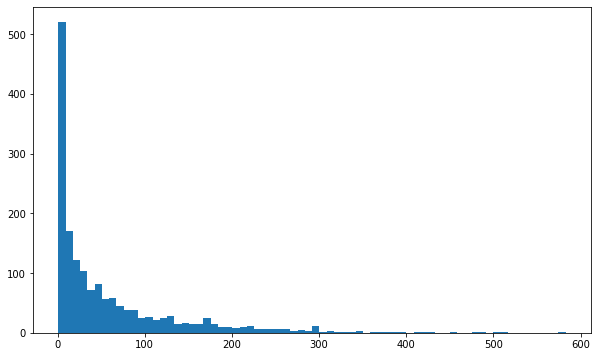

In [25]:
plt.figure(figsize=(10,6))
plt.hist(ratings['numberOfRatings'], bins=70)
plt.axes()
plt.show()

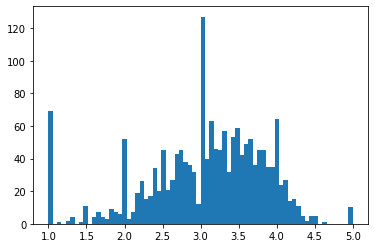

In [26]:
plt.hist(ratings['rating'], bins=70)
plt.show()

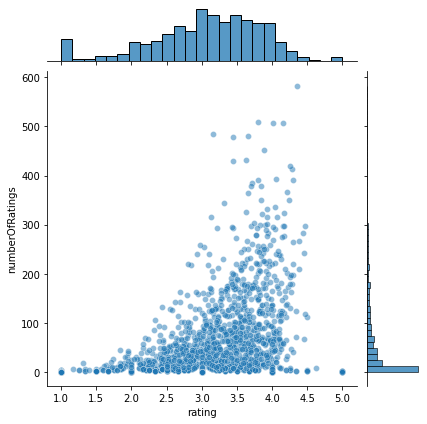

In [27]:
sns.jointplot(x='rating', y='numberOfRatings', data=ratings, alpha=0.5)

In [28]:
#Creating Movie Recommendation

In [29]:
df.head()

,userId,itemId,rating,timestamp,movieName
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [30]:
movieMat = df.pivot_table(index='userId', columns='movieName', values='rating')

In [31]:
movieMat.head()

movieName,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [32]:
ratings.sort_values('numberOfRatings', ascending=False)

,rating,numberOfRatings
movieName,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [33]:
 starWarsUserRating = movieMat['Star Wars (1977)']

In [34]:
starWarsUserRating.head()

userId
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [35]:
similarToStarWars = movieMat.corrwith(starWarsUserRating)

In [36]:
similarToStarWars.head()

movieName
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [37]:
correlationWithStarwars = pd.DataFrame(similarToStarWars, columns=['Correlation'])

In [38]:
correlationWithStarwars.head()

,Correlation
movieName,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [39]:
correlationWithStarwars.dropna(inplace=True)

In [40]:
correlationWithStarwars

,Correlation
movieName,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [41]:
correlationWithStarwars.sort_values('Correlation', ascending=False).head(10)

,Correlation
movieName,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [42]:
correlationWithStarwars = correlationWithStarwars.join(ratings['numberOfRatings'])

In [43]:
correlationWithStarwars.head()

,Correlation,numberOfRatings
movieName,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [44]:
correlationWithStarwars[correlationWithStarwars['numberOfRatings']>100].sort_values('Correlation', ascending = False)

,Correlation,numberOfRatings
movieName,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [45]:
#making the predict function which will work for any input movie

In [46]:
def predictMovies(movieName):
    movieUserRating = movieMat[movieName]
    similarToMovie = movieMat.corrwith(movieUserRating)
    correlationWithMovie = pd.DataFrame(similarToMovie, columns=['Correlation'])
    correlationWithMovie.dropna(inplace=True)
    correlationWithMovie = correlationWithMovie.join(ratings['numberOfRatings'])
    predictions = correlationWithMovie[correlationWithMovie['numberOfRatings']>100].sort_values('Correlation', ascending = False)
    return predictions

In [47]:
movieName = input()
predictions = predictMovies(movieName)
predictions.drop(movieName).head(20)

,Correlation,numberOfRatings
movieName,,
"Ghost and the Darkness, The (1996)",0.553154,128
Raiders of the Lost Ark (1981),0.539606,420
Young Guns (1988),0.492670,101
Back to the Future (1985),0.479793,350
"Firm, The (1993)",0.477194,151
Donnie Brasco (1997),0.469901,147
Waterworld (1995),0.465230,102
Independence Day (ID4) (1996),0.461999,429
"Lost World: Jurassic Park, The (1997)",0.452847,158
